In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split
import numpy as np


In [2]:
df=pd.read_csv('C:\\Users\\palay\\OneDrive\\Desktop\\personal\\comment_analyzer\\ml\\YoutubeCommentsDataSet.csv')

In [3]:
df.head()

,Comment,Sentiment
0,lets not forget that apple pay in 2014 require...,neutral
1,here in nz 50 of retailers don’t even have con...,negative
2,i will forever acknowledge this channel with t...,positive
3,whenever i go to a place that doesn’t take app...,negative
4,apple pay is so convenient secure and easy to ...,positive


In [4]:
df.tail()

,Comment,Sentiment
18403,i really like the point about engineering tool...,positive
18404,i’ve just started exploring this field and thi...,positive
18405,excelente video con una pregunta filosófica pr...,neutral
18406,hey daniel just discovered your channel a coup...,positive
18407,this is great focus is key a playful approach ...,positive


In [5]:
df.describe

<bound method NDFrame.describe of                                                  Comment Sentiment
0      lets not forget that apple pay in 2014 require...   neutral
1      here in nz 50 of retailers don’t even have con...  negative
2      i will forever acknowledge this channel with t...  positive
3      whenever i go to a place that doesn’t take app...  negative
4      apple pay is so convenient secure and easy to ...  positive
...                                                  ...       ...
18403  i really like the point about engineering tool...  positive
18404  i’ve just started exploring this field and thi...  positive
18405  excelente video con una pregunta filosófica pr...   neutral
18406  hey daniel just discovered your channel a coup...  positive
18407  this is great focus is key a playful approach ...  positive

[18408 rows x 2 columns]>

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18408 entries, 0 to 18407
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Comment    18364 non-null  object
 1   Sentiment  18408 non-null  object
dtypes: object(2)
memory usage: 287.8+ KB


In [7]:
df['Sentiment'].unique()

array(['neutral', 'negative', 'positive'], dtype=object)

In [8]:
df['Sentiment'].value_counts()['neutral']

4638

In [9]:
df['Sentiment'].value_counts()['positive']

11432

In [10]:
df['Sentiment'].value_counts()['negative']

2338

In [11]:
df.shape

(18408, 2)

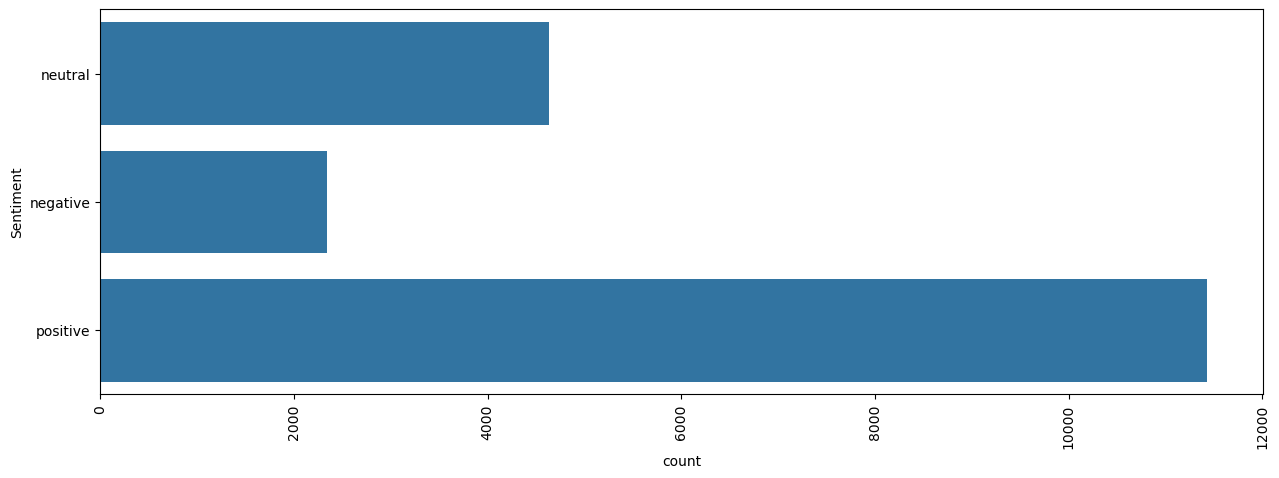

In [12]:
plt.figure(figsize=(15,5))
sns.countplot(df['Sentiment'])
plt.xticks(rotation=90)
plt.show()

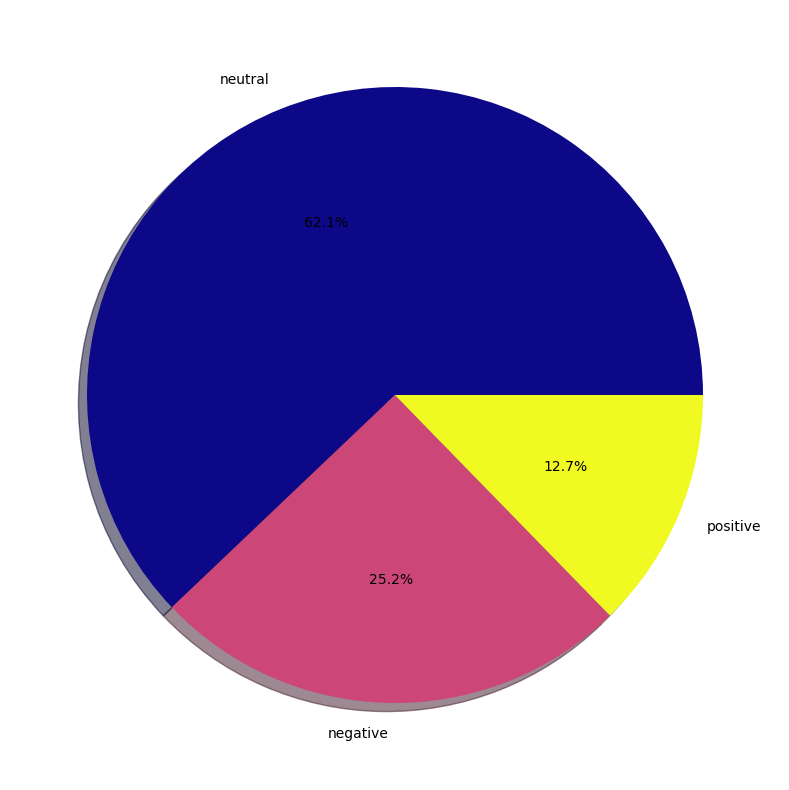

In [13]:
counts = df['Sentiment'].value_counts()
labels = df['Sentiment'].unique()
plt.figure(figsize=(15,10))

plt.pie(counts,labels=labels,autopct='%1.1f%%',shadow=True, colors=plt.cm.plasma(np.linspace(0,1,3)))
plt.show()

In [14]:
df['Sentiment'][0]

'neutral'

In [15]:
df['Comment'][0]

'lets not forget that apple pay in 2014 required a brand new iphone in order to use it a significant portion of apples user base wasnt able to use it even if they wanted to as each successive iphone incorporated the technology and older iphones were replaced the number of people who could use the technology increased'

In [16]:

from sklearn.utils import resample
max_count =df['Sentiment'].value_counts().max()

balanced_data = []
for category in df['Sentiment'].unique():
    category_data = df[df['Sentiment'] == category]
    if len(category_data) < max_count:
       
        balanced_category_data = resample(category_data, replace=True, n_samples=max_count, random_state=42)
    else:
       
        balanced_category_data = resample(category_data, replace=False, n_samples=max_count, random_state=42)
    balanced_data.append(balanced_category_data)


balanced_df = pd.concat(balanced_data)

In [17]:
balanced_df.dropna(inplace=True)

In [18]:
balanced_df['Sentiment'].value_counts()['positive']

11402

In [19]:
balanced_df['Sentiment'].value_counts()['negative']

11428

In [20]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()

In [21]:

balanced_df['Sentiment']=label.fit_transform(balanced_df['Sentiment'])

In [22]:
X = balanced_df['Comment']
y = balanced_df['Sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
from sklearn.metrics import classification_report

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [25]:

tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [26]:
X_train_tfidf

<27383x36278 sparse matrix of type '<class 'numpy.float64'>'
	with 732383 stored elements in Compressed Sparse Row format>

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

Accuracy: 0.9478527607361963
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      2280
           1       0.94      0.93      0.93      2269
           2       0.92      0.93      0.93      2297

    accuracy                           0.95      6846
   macro avg       0.95      0.95      0.95      6846
weighted avg       0.95      0.95      0.95      6846



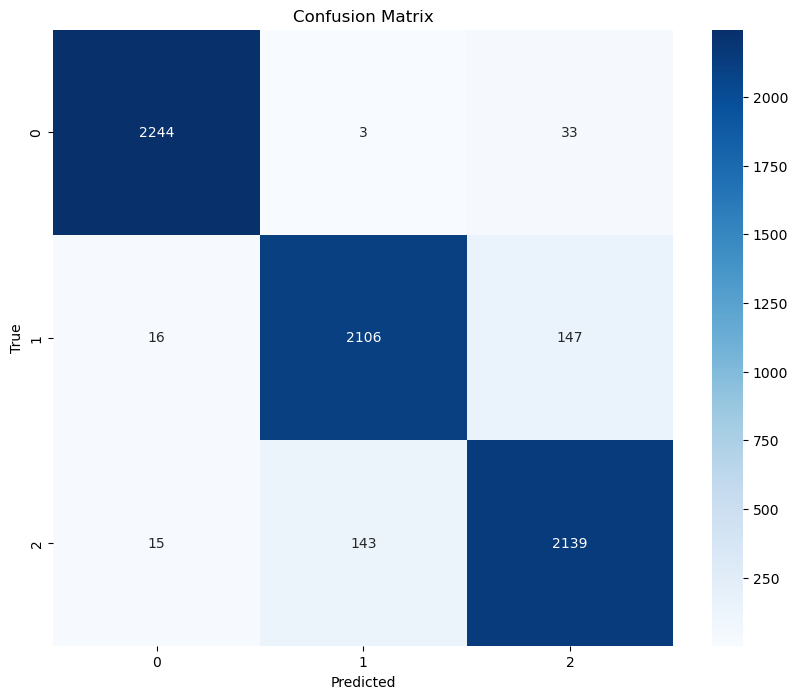

In [28]:

from sklearn.metrics import classification_report, confusion_matrix

rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train_tfidf, y_train)

y_pred = rf_classifier.predict(X_test_tfidf)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test,y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=rf_classifier.classes_, yticklabels=rf_classifier.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [29]:
from sklearn.ensemble import AdaBoostClassifier

In [30]:
from sklearn.tree import DecisionTreeClassifier
base_learner=DecisionTreeClassifier(max_depth=1)

In [31]:
adaboost = AdaBoostClassifier(base_learner, n_estimators=50, learning_rate=1.0, random_state=42)

adaboost.fit(X_train_tfidf, y_train)

c:\Users\palay\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   random_state=42)

In [32]:
y_pred = adaboost.predict(X_test_tfidf)
accuracy = accuracy_score(y_test, y_pred)

In [33]:
print(accuracy)

0.6269354367513876


In [34]:
from sklearn.naive_bayes import MultinomialNB


In [35]:
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_tfidf, y_train)

MultinomialNB()

In [36]:

y_pred = nb_classifier.predict(X_test_tfidf)


In [37]:

print("Accuracy:", accuracy_score(y_test, y_pred))

print(classification_report(y_test, y_pred))


Accuracy: 0.7808939526730938
              precision    recall  f1-score   support

           0       0.70      0.96      0.81      2280
           1       0.91      0.55      0.69      2269
           2       0.81      0.83      0.82      2297

    accuracy                           0.78      6846
   macro avg       0.81      0.78      0.77      6846
weighted avg       0.81      0.78      0.77      6846



In [38]:
from sklearn.naive_bayes import GaussianNB 
gnb=GaussianNB()

In [39]:
from sklearn.linear_model import LogisticRegression
logi=LogisticRegression()


logi.fit(X_train_tfidf,y_train)
ypred=logi.predict(X_test_tfidf)
print(accuracy_score(y_test,ypred))

0.8672217353198949


In [40]:
report=print(classification_report(y_test,ypred,output_dict=True))

{'0': {'precision': 0.86158755484643, 'recall': 0.9473684210526315, 'f1-score': 0.9024441194902862, 'support': 2280.0}, '1': {'precision': 0.8348348348348348, 'recall': 0.8576465403261349, 'f1-score': 0.8460869565217392, 'support': 2269.0}, '2': {'precision': 0.9118525896414342, 'recall': 0.7971266869830214, 'f1-score': 0.8506387921022067, 'support': 2297.0}, 'accuracy': 0.8672217353198949, 'macro avg': {'precision': 0.8694249931075664, 'recall': 0.8673805494539293, 'f1-score': 0.8663899560380773, 'support': 6846.0}, 'weighted avg': {'precision': 0.8695859280888804, 'recall': 0.8672217353198949, 'f1-score': 0.8663834651248097, 'support': 6846.0}}


In [41]:
import re
def clean(txt):
    cleanText = re.sub('http\S+\s', ' ', txt)
    cleanText = re.sub('RT|cc', ' ', cleanText)
    cleanText = re.sub('#\S+\s', ' ', cleanText)
    cleanText = re.sub('@\S+', '  ', cleanText)  
    cleanText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', cleanText)
    cleanText = re.sub(r'[^\x00-\x7f]', ' ', cleanText) 
    cleanText = re.sub('\s+', ' ', cleanText)
    return cleanText


def predict_category(comment_text):
    comment_text= clean(comment_text)
    comment_tfidf = tfidf_vectorizer.transform([comment_text])
    predicted_category =logi.predict(comment_tfidf)[0]
    return predicted_category

<>:3: SyntaxWarning: invalid escape sequence '\S'
<>:5: SyntaxWarning: invalid escape sequence '\S'
<>:6: SyntaxWarning: invalid escape sequence '\S'
<>:7: SyntaxWarning: invalid escape sequence '\]'
<>:9: SyntaxWarning: invalid escape sequence '\s'
<>:3: SyntaxWarning: invalid escape sequence '\S'
<>:5: SyntaxWarning: invalid escape sequence '\S'
<>:6: SyntaxWarning: invalid escape sequence '\S'
<>:7: SyntaxWarning: invalid escape sequence '\]'
<>:9: SyntaxWarning: invalid escape sequence '\s'
C:\Users\palay\AppData\Local\Temp\ipykernel_19348\2745276811.py:3: SyntaxWarning: invalid escape sequence '\S'
  cleanText = re.sub('http\S+\s', ' ', txt)
C:\Users\palay\AppData\Local\Temp\ipykernel_19348\2745276811.py:5: SyntaxWarning: invalid escape sequence '\S'
  cleanText = re.sub('#\S+\s', ' ', cleanText)
C:\Users\palay\AppData\Local\Temp\ipykernel_19348\2745276811.py:6: SyntaxWarning: invalid escape sequence '\S'
  cleanText = re.sub('@\S+', '  ', cleanText)
C:\Users\palay\AppData\Local\T

In [42]:
comment=""

predict=predict_category(comment)
if(predict==1):
    print('Neutral')
elif (predict==2):
    print("Positive")
else:
    print("negative")        


Neutral


In [43]:
import pickle

In [44]:
with open("comment_an.pkl", "wb") as file:
    pickle.dump(logi, file)


In [5]:
import mlflow # type: ignore
 # type: ignore
 
mlflow.set_experiment("comment_analyzer")
mlflow.set_tracking_uri("http://127.0.0.1:5000/")

with mlflow.start_run():

    mlflow.log_params()
    

    for class_name, metrics in report.items():
        if class_name != 'accuracy':  
            for metric_name, value in metrics.items():
                metric_key = f"{class_name}_{metric_name}"
                mlflow.log_metric(metric_key, value)
    
    mlflow.log_metric('accuracy', report['accuracy'])
    
   
    mlflow.sklearn.log_model(logi, "Pipeline")


AttributeError: module 'mlflow' has no attribute 'set_experiment'